<a href="https://colab.research.google.com/github/piotr-sobieraj/wzorzec/blob/main/wzorzec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funkcje do generowania tekstu i wzorca

In [1]:
from random import choice
from string import ascii_uppercase as A
def generuj_losowy_tekst(długość, A):
  T = ''
  for _ in range(długość):
    T += choice(A)
  return T


W = generuj_losowy_tekst(4, A)
T = generuj_losowy_tekst(17, A)

print(W, T)

KSFU DKCEYTNRJHUHYBXKE


# Funkcja pasuje_na(tekst, wzorzec, p)



In [2]:
def pasuje_na(tekst, wzorzec, pozycja):
  porownania = 0

  for i in range(len(wzorzec)):
    porownania += 1
    if tekst[pozycja + i] != wzorzec[i]:
      return False, porownania
  return True, porownania

assert(pasuje_na("ABCBBC", "X", 4) == (False, 1))
assert(pasuje_na("ABCBBC", "BC", 1) == (True, 2))
assert(pasuje_na("ABCBBC", "BBC", 4) == (False, 2))


# Szukanie wszystkich wystąpień - podejście naiwne

In [3]:
def wzorzec_naiwny(tekst, wzorzec):
    indeksy = []
    licznik_porownan = 0

    for i in range(len(tekst) - len(wzorzec) + 1):
        pasuje, porownania = pasuje_na(tekst, wzorzec, i)
        licznik_porownan += porownania
        if pasuje:
            indeksy.append(i)

    return indeksy, licznik_porownan



assert(wzorzec_naiwny(tekst="ABRACADABRA", wzorzec="AB") == ([0, 7], 14))
assert(wzorzec_naiwny(tekst="CABABAC", wzorzec="AB") == ([1, 3], 9))
assert(wzorzec_naiwny(tekst="CABABAC", wzorzec="X") == ([], 7))


# Szukanie wzorca - algorytm Sundaya

## Bez słownika

In [4]:
def wzorzec_sunday(tekst, wzorzec):
    """
    Algorytm Sunday'a: wyszukuje pierwsze wystąpienie wzorzec w tekst.
    Zwraca (True, indeks, liczba porównań) lub (False, -1, licznik_porownan).
    """
    licznik_porownan, l_tekst, l_wzorzec = 0, len(tekst), len(wzorzec)

    if l_wzorzec > l_tekst:
        return False, -1, licznik_porownan

    # Tablica przesunięć: ostatnie wystąpienie znaku we wzorcu liczone od końca
    # shift[c] = m - i, gdzie i to indeks *ostatniego* wystąpienia c w wzorcu
    shift = {}
    for i, ch in enumerate(wzorzec):
        shift[ch] = l_wzorzec - i

    i = 0  # początek okna w tekście
    while i <= l_tekst - l_wzorzec:
        # porównanie znak-po-znaku
        j = 0
        while j < l_wzorzec:
            licznik_porownan += 1
            if tekst[i + j] != wzorzec[j]:
                break
            j += 1

        if j == l_wzorzec:  # dopasowanie pełnego wzorca
            return True, i, licznik_porownan

        # znak za oknem
        next_idx = i + l_wzorzec
        if next_idx < l_tekst:
            c = tekst[next_idx]
            i += shift.get(c, l_wzorzec + 1)
        else:
            break

    return False, -1, licznik_porownan


assert(wzorzec_sunday(tekst="abcde", wzorzec="abcdef") == (False, -1, 0))
assert(wzorzec_sunday(tekst="abcde", wzorzec="cd") == (True, 2, 3))
assert(wzorzec_sunday(tekst="abcdef", wzorzec="xy") == (False, -1, 2))

## Algorytm Sundaya ze słownikiem lastp

# Wykresy

In [5]:
def zbuduj_lastp(wzorzec):
    """
    lastp[c] = indeks ostatniego wystąpienia znaku c w wzorcu,
    a jeśli c nie występuje -> -1.
    """
    lastp = {}
    for i, ch in enumerate(wzorzec):
        lastp[ch] = i
    return lastp

def wzorzec_sunday_lastp(tekst, wzorzec):
    """
    Algorytm Sunday'a zgodnie z opisem z tablicą lastp,
    wykorzystujący pasuje_na(...) do porównań w oknie.
    Zwraca (found: bool, index: int, licznik_porownan: int).
    """
    licznik_porownan, l_tekst, l_wzorzec = 0, len(tekst), len(wzorzec)

    if l_wzorzec == 0:
        return True, 0, licznik_porownan
    if l_wzorzec > l_tekst:
        return False, -1, licznik_porownan

    lastp = zbuduj_lastp(wzorzec)

    i = 0  # początek okna
    while i <= l_tekst - l_wzorzec:
        # porównuj całe okno przy użyciu pasuje_na
        pasuje, porownania = pasuje_na(tekst, wzorzec, i)
        licznik_porownan += porownania
        if pasuje:
            return True, i, licznik_porownan  # pełne dopasowanie

        # znak tuż za aktualnym oknem
        next_idx = i + l_wzorzec
        if next_idx >= l_tekst:
            break
        c = tekst[next_idx]

        # reguła przesunięcia Sunday'a z użyciem lastp
        last_idx = lastp.get(c, -1)
        if last_idx == -1:
            i += l_wzorzec + 1
        else:
            i += l_wzorzec - last_idx

    return False, -1, licznik_porownan


assert(wzorzec_sunday_lastp(tekst="abcde", wzorzec="abcdef") == (False, -1, 0))
assert(wzorzec_sunday_lastp(tekst="abcde", wzorzec="cd") == (True, 2, 3))
assert(wzorzec_sunday_lastp(tekst="abcdef", wzorzec="xy") == (False, -1, 2))

## Liczba porównań w zal. od długości tekstu (dł. wzorca i alfabetu jest stała)

---



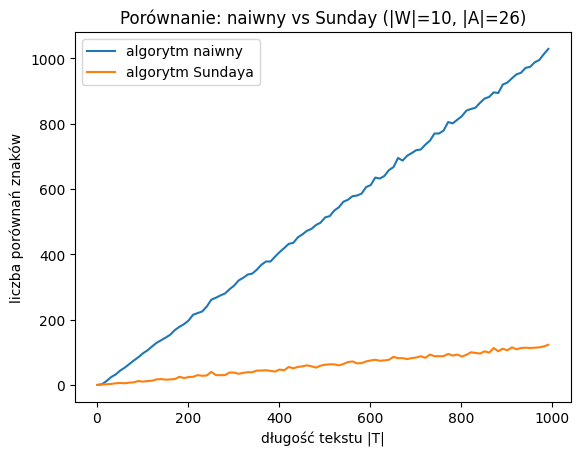

In [6]:
from matplotlib import pyplot as plt

DŁUGOŚĆ_WZORCA = 10
X, Y_naiwny, Y_sunday = [], [], []

wzorzec = generuj_losowy_tekst(DŁUGOŚĆ_WZORCA, A)


for długość_tekstu in range(1, 1000, 10):
  tekst = generuj_losowy_tekst(długość_tekstu, A)
  _, liczba_porownan_n = wzorzec_naiwny(tekst, wzorzec)
  _, _, liczba_porownan_s = wzorzec_sunday_lastp(tekst, wzorzec)
  X.append(długość_tekstu)
  Y_naiwny.append(liczba_porownan_n)
  Y_sunday.append(liczba_porownan_s)

plt.plot(X, Y_naiwny, label="algorytm naiwny")
plt.plot(X, Y_sunday, label="algorytm Sundaya")

plt.xlabel("długość tekstu |T|")
plt.ylabel("liczba porównań znaków")
plt.title(f"Porównanie: naiwny vs Sunday (|W|={DŁUGOŚĆ_WZORCA}, |A|={len(A)})")

plt.legend()
plt.show()


## Liczba porównań w zal. od długości wzorca (dł. tekstu i alfabetu jest stała)


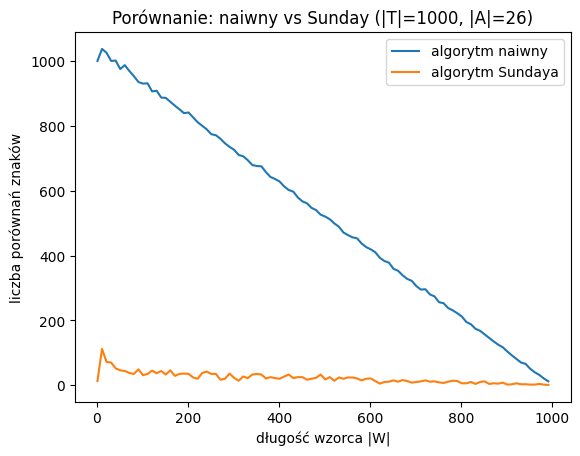

In [7]:
from matplotlib import pyplot as plt

DŁUGOŚĆ_TEKSTU = 1000
X, Y_naiwny, Y_sunday = [], [], []

tekst = generuj_losowy_tekst(DŁUGOŚĆ_TEKSTU, A)


for długość_wzorca in range(1, 1000, 10):
  wzorzec = generuj_losowy_tekst(długość_wzorca, A)

  _, liczba_porownan_n = wzorzec_naiwny(tekst, wzorzec)
  _, _, liczba_porownan_s = wzorzec_sunday_lastp(tekst, wzorzec)
  X.append(długość_wzorca)
  Y_naiwny.append(liczba_porownan_n)
  Y_sunday.append(liczba_porownan_s)


plt.plot(X, Y_naiwny, label="algorytm naiwny")
plt.plot(X, Y_sunday, label="algorytm Sundaya")

plt.xlabel("długość wzorca |W|")
plt.ylabel("liczba porównań znaków")
plt.title(f"Porównanie: naiwny vs Sunday (|T|={DŁUGOŚĆ_TEKSTU}, |A|={len(A)})")

plt.legend()
plt.show()



## Liczba porównań w zal. od długości alfabetu (dł. tekstu i wzorca jest stała)

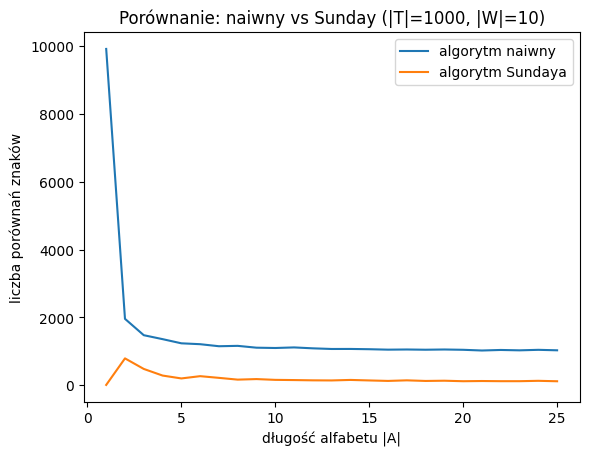

In [9]:
from matplotlib import pyplot as plt
from string import ascii_uppercase as A

DŁUGOŚĆ_TEKSTU = 1000
DŁUGOŚĆ_WZORCA = 10

X, Y_naiwny, Y_sunday = [], [], []


for długość_alfabetu in range(1, len(A)):
  tekst = generuj_losowy_tekst(DŁUGOŚĆ_TEKSTU, A[:długość_alfabetu])
  wzorzec = generuj_losowy_tekst(DŁUGOŚĆ_WZORCA, A[:długość_alfabetu])

  _, liczba_porownan_n = wzorzec_naiwny(tekst, wzorzec)
  _, _, liczba_porownan_s = wzorzec_sunday_lastp(tekst, wzorzec)

  X.append(długość_alfabetu)
  Y_naiwny.append(liczba_porownan_n)
  Y_sunday.append(liczba_porownan_s)


plt.plot(X, Y_naiwny, label="algorytm naiwny")
plt.plot(X, Y_sunday, label="algorytm Sundaya")

plt.xlabel("długość alfabetu |A|")
plt.ylabel("liczba porównań znaków")
plt.title(f"Porównanie: naiwny vs Sunday (|T|={DŁUGOŚĆ_TEKSTU}, |W|={len(wzorzec)})")

plt.legend()
plt.show()
